
# Image Classification with CNN


Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

------------

## Task

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot
    
 

## Libraries

In [1]:
import pandas as pd
import seaborn as sns
import tensorflow as tf                       
import numpy as np                           
import matplotlib.pyplot as plt               
%matplotlib inline

## The Data

**Download the fashion mnist dataset using Keras.**

In [2]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")  

There are  60000 images in the training dataset
There are  10000 images in the test dataset


## Classes

In [4]:
classes = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

## Visualizing the Data

**Using matplotlib show an any image from the data set.**

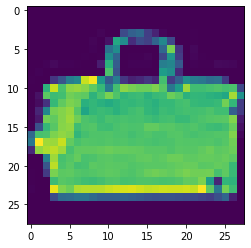

In [5]:
plt.imshow(X_train[99])


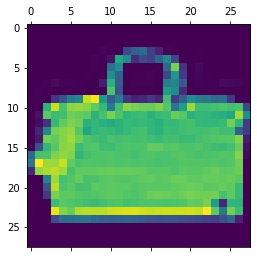

In [6]:
plt.matshow(X_train[99]);

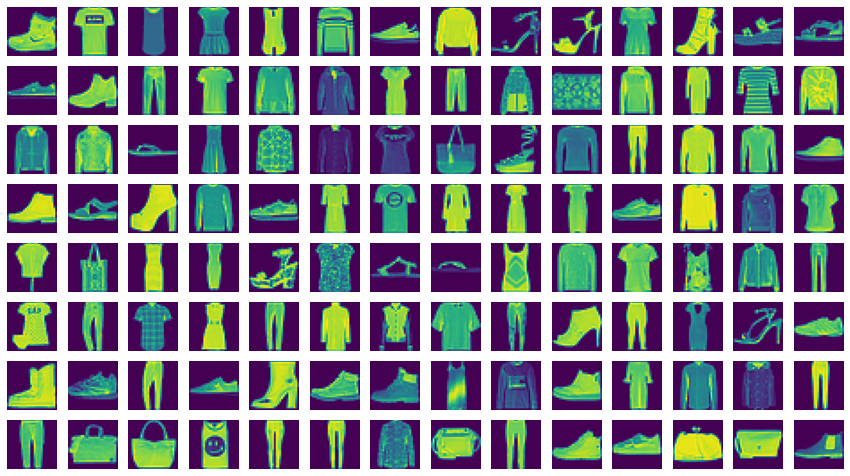

In [7]:
plt.figure(figsize= (15,15))
for i in range(112):
  plt.subplot(14,14,i+1)
  plt.axis('off')
  plt.imshow(X_train[i])

## Preprocessing the Data

**Normalize the X train and X test using max value of the image arrays.**

In [8]:
X_train.min()

0

In [9]:
X_train.max()

255

In [10]:
# range between 0 to 255
# first transform them to float
# then manually minmax scale inside between 0 and 1
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [11]:
X_train.min()

0.0

In [12]:
X_train.max()

1.0

**Reshape the X into 4 dimension**

In [13]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [14]:
# let's make them 4D
X_train = X_train.reshape(X_train.shape[0],28, 28,1) 
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

**Convert the y_train and y_test values to be one-hot encoded for categorical analysis.**

In [15]:
from tensorflow.keras.utils import to_categorical

In [16]:
Y_train = to_categorical(y_train, 10) 
Y_test = to_categorical(y_test, 10)
Y_train.shape, Y_test.shape

((60000, 10), (10000, 10))

## Building the Model

**Create the model**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)  # I put dropout extra

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [17]:
X_train[1].shape  # it will be input shape for our model

(28, 28, 1)

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [19]:
model = Sequential()

model.add(Conv2D(filters=28,kernel_size=(3,3),input_shape=(28, 28, 1), activation='relu',))
model.add(MaxPool2D(pool_size=(2, 2),strides=(1,1)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 25, 25, 28)        0         
_________________________________________________________________
dropout (Dropout)            (None, 25, 25, 28)        0         
_________________________________________________________________
flatten (Flatten)            (None, 17500)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                1120064   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 1,120,994
Trainable params: 1,120,994
Non-trainable params: 0
______________________________________________

###  Model Training 

**Train the model with arbitrary amount of epochs.**

**Train the model using earlystop.**

In [21]:
from tensorflow.keras.callbacks import EarlyStopping

In [29]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [30]:
model.fit(X_train, Y_train, batch_size=32, epochs=10, validation_data=(X_test,Y_test))

Epoch 1/10
1875/1875 [==============================] - 95s 51ms/step - loss: 0.2136 - accuracy: 0.9236 - val_loss: 0.2739 - val_accuracy: 0.9049
Epoch 2/10
1875/1875 [==============================] - 103s 55ms/step - loss: 0.2038 - accuracy: 0.9285 - val_loss: 0.2772 - val_accuracy: 0.9056
Epoch 3/10
1875/1875 [==============================] - 114s 61ms/step - loss: 0.1957 - accuracy: 0.9314 - val_loss: 0.2724 - val_accuracy: 0.9100
Epoch 4/10
1875/1875 [==============================] - 113s 60ms/step - loss: 0.1917 - accuracy: 0.9334 - val_loss: 0.2686 - val_accuracy: 0.9101
Epoch 5/10
1875/1875 [==============================] - 127s 68ms/step - loss: 0.1877 - accuracy: 0.9337 - val_loss: 0.2842 - val_accuracy: 0.9063
Epoch 6/10
1875/1875 [==============================] - 124s 66ms/step - loss: 0.1810 - accuracy: 0.9367 - val_loss: 0.2894 - val_accuracy: 0.9108
Epoch 7/10
1875/1875 [==============================] - 114s 61ms/step - loss: 0.1775 - accuracy: 0.9380 - val_loss: 0.

**Plot values of metrics you used in your model.**

**Plot values of metrics you used in your model.**

In [31]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.213575,0.923617,0.273882,0.9049
1,0.203754,0.928533,0.277177,0.9056
2,0.195659,0.931400,0.272392,0.9100
3,0.191705,0.933450,0.268592,0.9101
4,0.187697,0.933733,0.284157,0.9063


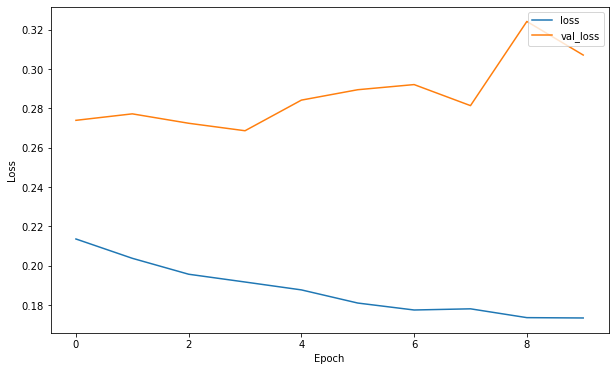

In [32]:
plt.figure(figsize=(10,6))
plt.plot(summary.loss, label="loss")
plt.plot(summary.val_loss, label="val_loss")
plt.legend(loc="upper right")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

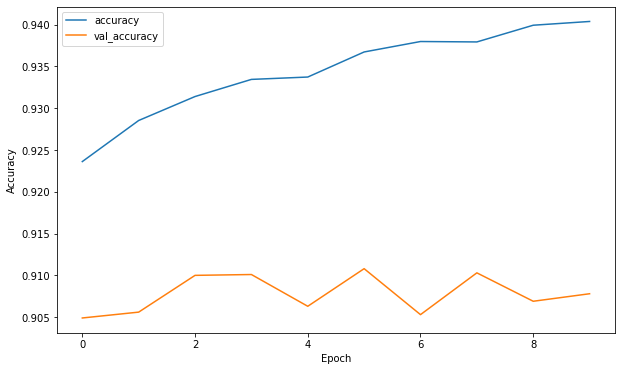

In [33]:
plt.figure(figsize=(10,6))
plt.plot(summary.accuracy, label="accuracy")
plt.plot(summary.val_accuracy, label="val_accuracy")
plt.legend(loc="upper left")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

### Model Evaluation

**Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set.**

In [34]:
model.metrics_names

['loss', 'accuracy']

In [35]:
model.history.history

{'loss': [0.213575080037117,
  0.2037544697523117,
  0.19565878808498383,
  0.1917046159505844,
  0.18769735097885132,
  0.18101663887500763,
  0.17748016119003296,
  0.17807747423648834,
  0.17359808087348938,
  0.1734255999326706],
 'accuracy': [0.9236166477203369,
  0.9285333156585693,
  0.9314000010490417,
  0.9334499835968018,
  0.933733344078064,
  0.9367333054542542,
  0.9379833340644836,
  0.9379333257675171,
  0.9399333596229553,
  0.9403833150863647],
 'val_loss': [0.27388209104537964,
  0.2771765887737274,
  0.27239224314689636,
  0.26859188079833984,
  0.28415676951408386,
  0.2894405722618103,
  0.2920529544353485,
  0.28135615587234497,
  0.32413339614868164,
  0.30706459283828735],
 'val_accuracy': [0.9049000144004822,
  0.9056000113487244,
  0.9100000262260437,
  0.910099983215332,
  0.9063000082969666,
  0.9107999801635742,
  0.9053000211715698,
  0.9103000164031982,
  0.9068999886512756,
  0.907800018787384]}

In [36]:
from sklearn.metrics import classification_report,confusion_matrix, plot_confusion_matrix

In [37]:
preds = model.predict(X_test)

In [38]:
predictions= np.argmax(preds, axis=1)

In [39]:
predictions

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [40]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.87      0.84      0.85      1000
           1       0.99      0.98      0.98      1000
           2       0.88      0.84      0.86      1000
           3       0.94      0.86      0.90      1000
           4       0.84      0.88      0.86      1000
           5       0.98      0.97      0.98      1000
           6       0.72      0.79      0.75      1000
           7       0.94      0.98      0.96      1000
           8       0.96      0.98      0.97      1000
           9       0.98      0.94      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [41]:
print(confusion_matrix(y_test, predictions))

[[836   0  19  10   3   1 123   0   8   0]
 [  5 978   0   8   3   0   3   0   3   0]
 [ 17   2 842   4  57   0  76   0   2   0]
 [ 28   5  16 865  46   0  37   0   3   0]
 [  1   0  38  17 884   2  57   0   1   0]
 [  0   0   0   0   0 975   0  18   0   7]
 [ 76   0  35  20  61   0 789   0  18   1]
 [  0   0   0   0   0   6   0 985   1   8]
 [  3   1   3   1   2   2   6   2 980   0]
 [  0   0   0   0   0   6   0  47   3 944]]


**By setting verbose 0, 1 or 2 you just say how do you want to 'see' the training progress for each epoch.**

In [42]:
score_verbose_0 = model.evaluate(X_test,Y_test,verbose=0)
print('Test loss:', score_verbose_0[0])
print('Test accuracy:', score_verbose_0[1])

Test loss: 0.3070647418498993
Test accuracy: 0.907800018787384


In [43]:
score = model.evaluate(X_test,Y_test,verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 3s 9ms/step - loss: 0.3071 - accuracy: 0.9078
Test loss: 0.3070647418498993
Test accuracy: 0.907800018787384


# Prediction

In [44]:
my_image = X_test[46]

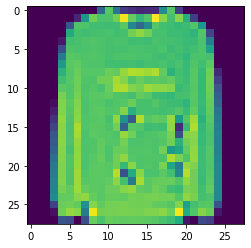

In [45]:
plt.imshow(my_image);

In [46]:
image_prediction=model.predict(my_image.reshape(1,28,28,1))

In [47]:
# SHAPE --> (num_images,width,height,color_channels)
np.argmax(image_prediction, axis=1)

array([2], dtype=int64)

In [48]:
result=np.argmax(image_prediction, axis=1)
classes[result[0]]

'Pullover'

# End of Assignment

In [49]:
model.save("Assignment-2.h5")